Линейная регрессия - строим линейную зависимость одной переменной от набора других. y = b0 + b1x1 + b2x2 + ... + bnxn + epsilon

Дерево решений - строим дерево, где в узлах двигаемся по ветвям в зависимости от значения признаков, в листьях - значения целевой функции. Дерево строим, пока в каждом листе не более n объектов или не достигнута заданная высота.

Случайный лес - ансамбль решающих деревьев, берём среднее предсказанное заданным количеством построенных на случайных данных из тренировочной выборки деревьев.

Нейронная сеть прямого распространения. Нейронная сеть без обратной связи, сигнал распространяется строго от входного слоя к выходному. Обучение происходит методом итеративного подбора коэффициентов нейронов для получения наиболее похожего результата на основе обучающей выборки. Т.к. здесь у нас регрессия, то на выходе получаем некоторое число.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

Датасет: https://www.kaggle.com/datasets/mirichoi0218/insurance/data

Датасет с счетами за медицинские услуги.

age - возраст

sex - пол

bmi - индекс массы тела

children - количество детей у пациента (вроде как по сути счета за них начисляются пациенту, если я правильно понял)

smoker - курильщик ли данный пациент

region - регион, делится на 4 зоны

charges - счёт

## Обработка данных

In [2]:
data = pd.read_csv('./insurance.csv')

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
le = LabelEncoder()
ct = ColumnTransformer([("region", OneHotEncoder(sparse_output=False), [5])], remainder = 'passthrough')
ct.set_output(transform='pandas')

data.sex = le.fit_transform(data.sex).astype(bool)

data.smoker = le.fit_transform(data.smoker).astype(bool)

data = ct.fit_transform(data)
data

,region__region_northeast,region__region_northwest,region__region_southeast,region__region_southwest,remainder__age,remainder__sex,remainder__bmi,remainder__children,remainder__smoker,remainder__charges
0,0.0,0.0,0.0,1.0,19,False,27.900,0,True,16884.92400
1,0.0,0.0,1.0,0.0,18,True,33.770,1,False,1725.55230
2,0.0,0.0,1.0,0.0,28,True,33.000,3,False,4449.46200
3,0.0,1.0,0.0,0.0,33,True,22.705,0,False,21984.47061
4,0.0,1.0,0.0,0.0,32,True,28.880,0,False,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,0.0,1.0,0.0,0.0,50,True,30.970,3,False,10600.54830
1334,1.0,0.0,0.0,0.0,18,False,31.920,0,False,2205.98080
1335,0.0,0.0,1.0,0.0,18,False,36.850,0,False,1629.83350
1336,0.0,0.0,0.0,1.0,21,False,25.800,0,False,2007.94500


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   region__region_northeast  1338 non-null   float64
 1   region__region_northwest  1338 non-null   float64
 2   region__region_southeast  1338 non-null   float64
 3   region__region_southwest  1338 non-null   float64
 4   remainder__age            1338 non-null   int64  
 5   remainder__sex            1338 non-null   bool   
 6   remainder__bmi            1338 non-null   float64
 7   remainder__children       1338 non-null   int64  
 8   remainder__smoker         1338 non-null   bool   
 9   remainder__charges        1338 non-null   float64
dtypes: bool(2), float64(6), int64(2)
memory usage: 86.4 KB


## Корреляция и прочие графики

In [7]:
data.corr()['remainder__charges'].sort_values()

region__region_southwest   -0.043210
region__region_northwest   -0.039905
region__region_northeast    0.006349
remainder__sex              0.057292
remainder__children         0.067998
region__region_southeast    0.073982
remainder__bmi              0.198341
remainder__age              0.299008
remainder__smoker           0.787251
remainder__charges          1.000000
Name: remainder__charges, dtype: float64

<Axes: >

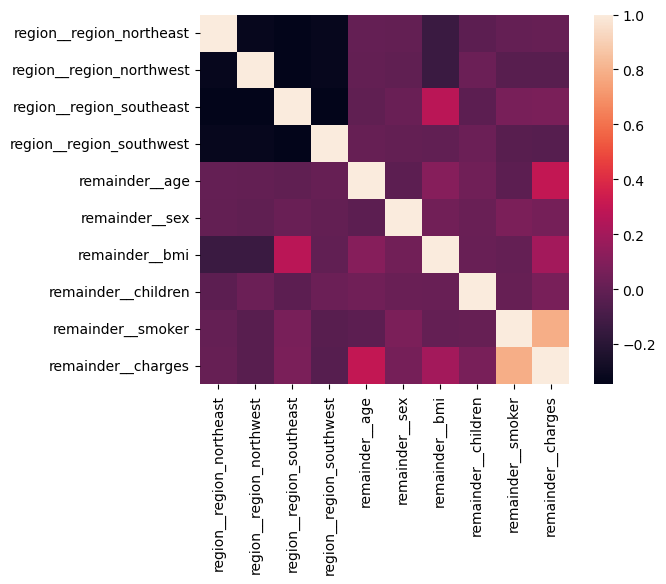

In [8]:
f, ax = plt.subplots()
corr = data.corr()
sns.heatmap(corr, square=True, ax=ax)

C:\Users\ultnie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


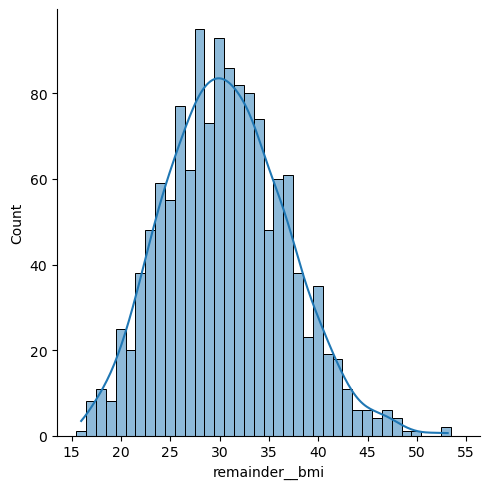

In [9]:
ax = sns.displot(data["remainder__bmi"], discrete=True, kde=True)

C:\Users\ultnie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


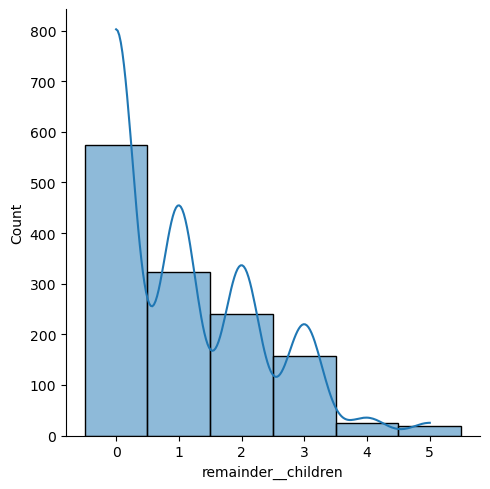

In [10]:
ax = sns.displot(data["remainder__children"], discrete=True, kde=True)

C:\Users\ultnie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


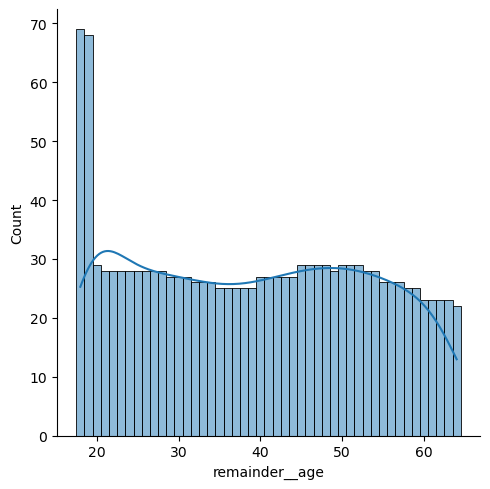

In [11]:
sns.displot(data["remainder__age"], discrete=True, kde=True)

## Обучение

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neural_network import MLPRegressor

In [1254]:
x = data.drop(["remainder__charges"], axis=1)
y = data.remainder__charges
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

dt = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=2)
rf = RandomForestRegressor(max_depth=5, min_samples_leaf=6, min_samples_split=4, n_estimators=70)



#dt_param = {'max_depth': range (1, 16, 2),
#            'min_samples_leaf': range (1, 11),
#            'min_samples_split': range (2, 11,2)}

#rf_param = {'n_estimators': range (10, 101, 10),
#            'max_depth': range (1, 16, 2), 
#            'min_samples_leaf': range (1, 11), 
#            'min_samples_split': range (2, 11, 2)}

#mlpr_param = {'hidden_layer_sizes': [(5,), (5, 5), (5, 5, 5), (5,5,5,5), (5,5,5,5,5)],
#             'activation': ['identity', 'logistic', 'tanh', 'relu'],
#             'solver': ['lbfgs', 'sgd', 'adam'],
#             'learning_rate': ['constant', 'invscaling', 'adaptive'],
#             'momentum': [0.1, 0.3, 0.6, 0.9],
#             'learning_rate_init': [0.1, 0.01, 0.001],
#             'max_iter': [1000]}

lr = LinearRegression().fit(x_train, y_train)
#griddt = GridSearchCV(dt, dt_param, cv=3, n_jobs = -1)
#gridrf = GridSearchCV(rf, rf_param, cv=3, n_jobs = -1)
#gridmlpr = GridSearchCV(mlpr, mlpr_param, cv=3, n_jobs=3, verbose=2)

dt.fit(x_train, y_train)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=6, min_samples_split=4,
                      n_estimators=70)

In [1313]:
mlpr = MLPRegressor(hidden_layer_sizes=(5, 5), learning_rate='adaptive', learning_rate_init=0.1, max_iter=10000, solver='lbfgs', momentum = 0.95, batch_size = 1400)
mlpr.fit(x_train, y_train)

MLPRegressor(batch_size=1400, hidden_layer_sizes=(5, 5),
             learning_rate='adaptive', learning_rate_init=0.1, max_iter=10000,
             momentum=0.95, solver='lbfgs')

In [1314]:
mlprsdg = MLPRegressor(hidden_layer_sizes=(5, 5, 5), learning_rate='adaptive', learning_rate_init=0.1, max_iter=10000, solver='sgd', momentum = 0.95, batch_size = 1400)
mlprsdg.fit(x_train, y_train)

C:\Users\ultnie\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


MLPRegressor(batch_size=1400, hidden_layer_sizes=(5, 5, 5),
             learning_rate='adaptive', learning_rate_init=0.1, max_iter=10000,
             momentum=0.95, solver='sgd')

In [1310]:
mlpradam = MLPRegressor(hidden_layer_sizes=(5, 5, 5), learning_rate='adaptive', learning_rate_init=0.1, max_iter=10000, solver='adam', momentum = 0.95, batch_size = 1400)
mlpradam.fit(x_train, y_train)

C:\Users\ultnie\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


MLPRegressor(batch_size=1400, hidden_layer_sizes=(5, 5, 5),
             learning_rate='adaptive', learning_rate_init=0.1, max_iter=10000,
             momentum=0.95)

## Предсказание и графики

In [1315]:
lr_train_pred = lr.predict(x_train)
lr_test_pred = lr.predict(x_test)

dt_train_pred = dt.predict(x_train)
dt_test_pred = dt.predict(x_test)

rf_train_pred = rf.predict(x_train)
rf_test_pred = rf.predict(x_test)

mlpr_train_pred = mlpr.predict(x_train)
mlpr_test_pred = mlpr.predict(x_test)

mlprsdg_train_pred = mlprsdg.predict(x_train)
mlprsdg_test_pred = mlprsdg.predict(x_test)

mlpradam_train_pred = mlpradam.predict(x_train)
mlpradam_test_pred = mlpradam.predict(x_test)

In [1259]:
print('LR MSE train: %.3f\nLR MSE test: %.3f' % (mean_squared_error(y_train, lr_train_pred), mean_squared_error(y_test, lr_test_pred)))
print('LR R2 train: %.3f\nLR R2 test: %.3f' % (r2_score(y_train, lr_train_pred), r2_score(y_test, lr_test_pred)))

LR MSE train: 36823590.442
LR MSE test: 35893259.921
LR R2 train: 0.746
LR R2 test: 0.760


In [1260]:
print('DT MSE train: %.3f\nDT MSE test: %.3f' % (mean_squared_error(y_train, dt_train_pred), mean_squared_error(y_test, dt_test_pred)))
print('DT R2 train: %.3f\nDT R2 test: %.3f' % (r2_score(y_train, dt_train_pred), r2_score(y_test, dt_test_pred)))

DT MSE train: 18290159.256
DT MSE test: 19959901.400
DT R2 train: 0.874
DT R2 test: 0.867


In [1261]:
print('RF MSE train: %.3f\nRF MSE test: %.3f' % (mean_squared_error(y_train, rf_train_pred), mean_squared_error(y_test, rf_test_pred)))
print('RF R2 train: %.3f\nRF R2 test: %.3f' % (r2_score(y_train, rf_train_pred), r2_score(y_test, rf_test_pred)))

RF MSE train: 17136164.239
RF MSE test: 18881619.897
RF R2 train: 0.882
RF R2 test: 0.874


In [1316]:
print('MLPR MSE train: %.3f\nMLPR MSE test: %.3f' % (mean_squared_error(y_train, mlpr_train_pred), mean_squared_error(y_test, mlpr_test_pred)))
print('MLPR R2 train: %.3f\nMLPR R2 test: %.3f' % (r2_score(y_train, mlpr_train_pred), r2_score(y_test, mlpr_test_pred)))

MLPR MSE train: 22848070.450
MLPR MSE test: 24488355.965
MLPR R2 train: 0.843
MLPR R2 test: 0.836


In [1317]:
print('MLPR sdg MSE train: %.3f\nMLPR MSE test: %.3f' % (mean_squared_error(y_train, mlprsdg_train_pred), mean_squared_error(y_test, mlprsdg_test_pred)))
print('MLPR sdg R2 train: %.3f\nMLPR R2 test: %.3f' % (r2_score(y_train, mlprsdg_train_pred), r2_score(y_test, mlprsdg_test_pred)))

MLPR sdg MSE train: 5938039575242899649114372523896594235392.000
MLPR MSE test: 5938039575242899649114372523896594235392.000
MLPR sdg R2 train: -40897174268104724534562777989120.000
MLPR R2 test: -39671699282738756031847858176000.000


In [1318]:
print('MLPR adam MSE train: %.3f\nMLPR MSE test: %.3f' % (mean_squared_error(y_train, mlpradam_train_pred), mean_squared_error(y_test, mlpradam_test_pred)))
print('MLPR adam R2 train: %.3f\nMLPR R2 test: %.3f' % (r2_score(y_train, mlpradam_train_pred), r2_score(y_test, mlpradam_test_pred)))

MLPR adam MSE train: 23021805.472
MLPR MSE test: 23508576.252
MLPR adam R2 train: 0.841
MLPR R2 test: 0.843


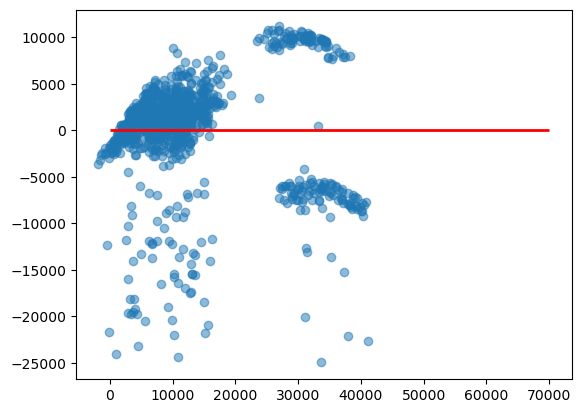

In [1319]:
plt.scatter(lr_train_pred, lr_train_pred - y_train, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 70000, lw = 2, color = 'red')

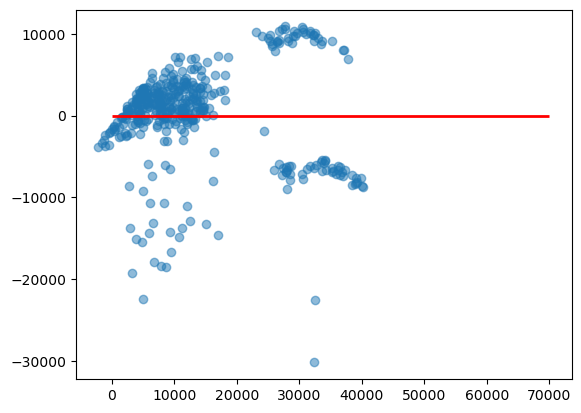

In [1320]:
plt.scatter(lr_test_pred, lr_test_pred - y_test, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 70000, lw = 2, color = 'red')

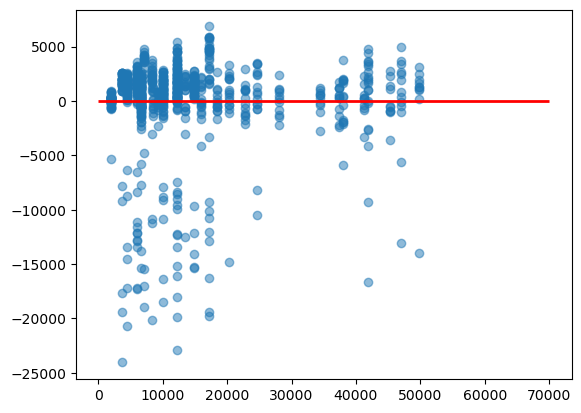

In [1321]:
plt.scatter(dt_train_pred, dt_train_pred - y_train, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 70000, lw = 2, color = 'red')

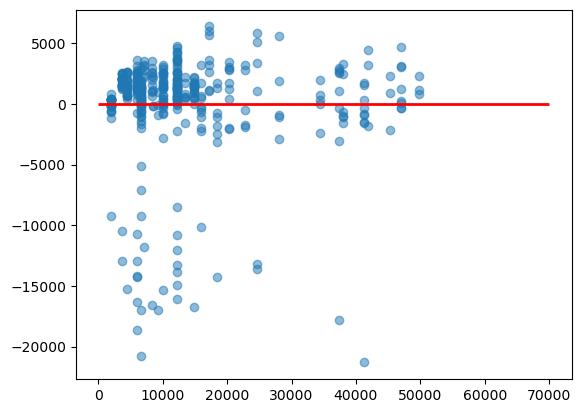

In [1322]:
plt.scatter(dt_test_pred, dt_test_pred - y_test, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 70000, lw = 2, color = 'red')

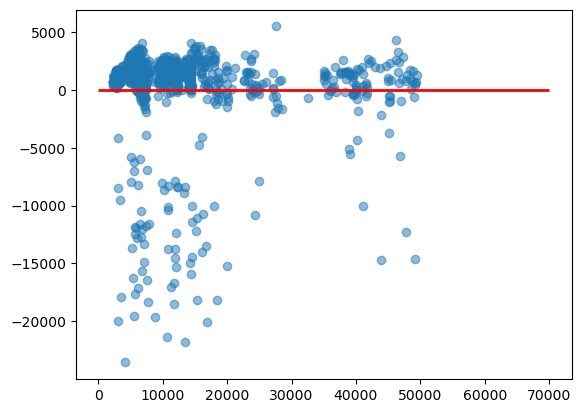

In [1323]:
plt.scatter(rf_train_pred, rf_train_pred - y_train, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 70000, lw = 2, color = 'red')

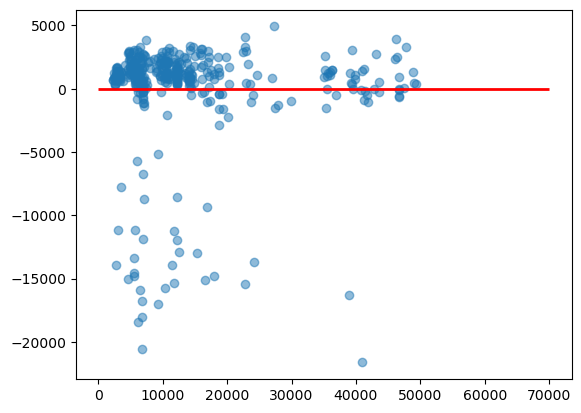

In [1324]:
plt.scatter(rf_test_pred, rf_test_pred - y_test, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 70000, lw = 2, color = 'red')

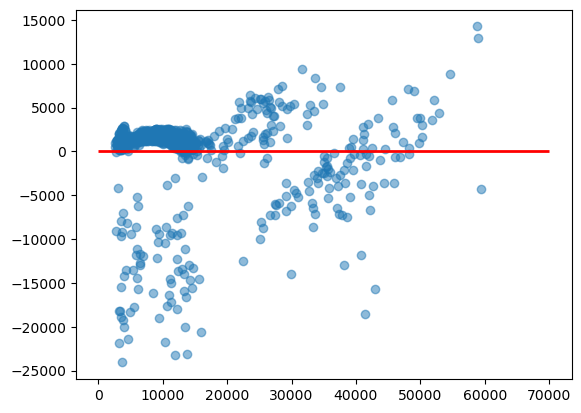

In [1325]:
plt.scatter(mlpr_train_pred, mlpr_train_pred - y_train, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 70000, lw = 2, color = 'red')

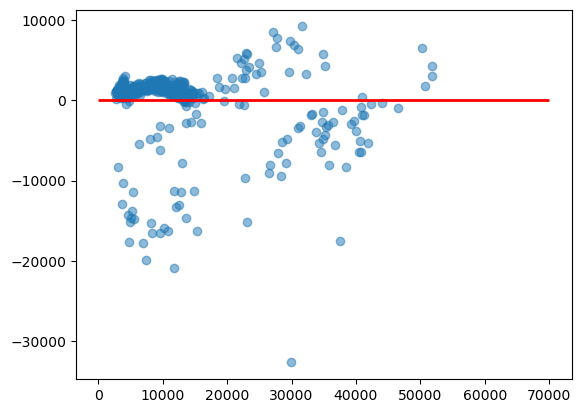

In [1326]:
plt.scatter(mlpr_test_pred, mlpr_test_pred - y_test, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 70000, lw = 2, color = 'red')

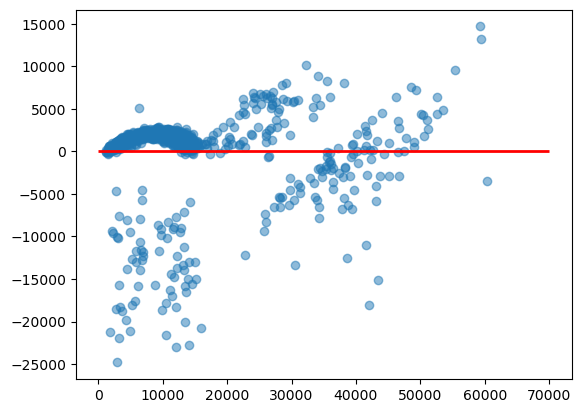

In [1327]:
plt.scatter(mlpradam_train_pred, mlpradam_train_pred - y_train, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 70000, lw = 2, color = 'red')

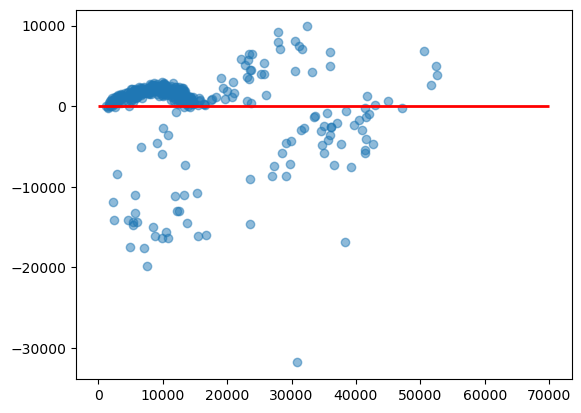

In [1328]:
plt.scatter(mlpradam_test_pred, mlpradam_test_pred - y_test, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 70000, lw = 2, color = 'red')

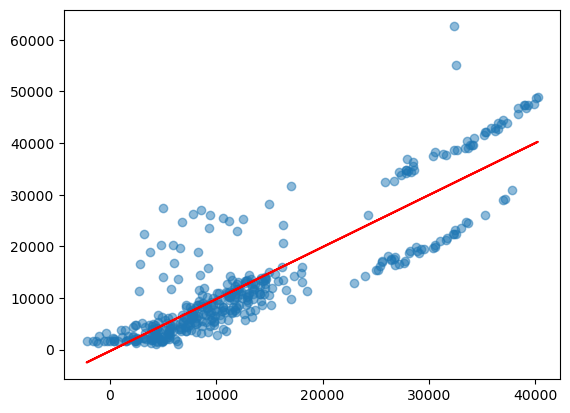

In [1329]:
plt.scatter(lr_test_pred, y_test, alpha = 0.5)
m, b = np.polyfit(lr_test_pred, y_test, 1)
plt.plot(lr_test_pred, m*lr_test_pred+b, color='red')

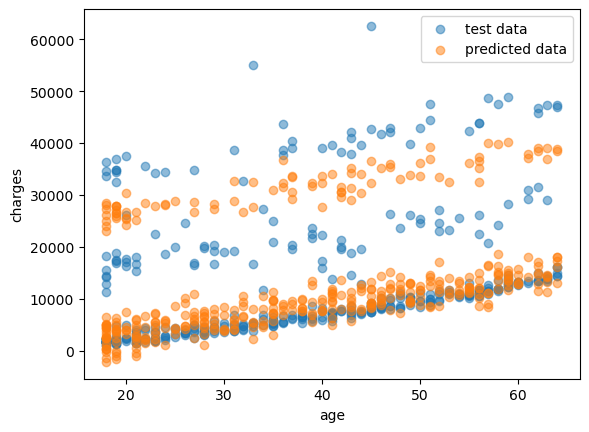

In [1330]:
plt.scatter(x_test['remainder__age'], y_test, alpha = 0.5, label = 'test data')
plt.scatter(x_test['remainder__age'], lr_test_pred, alpha = 0.5, label = 'predicted data')
plt.xlabel('age')
plt.ylabel('charges')
plt.legend()

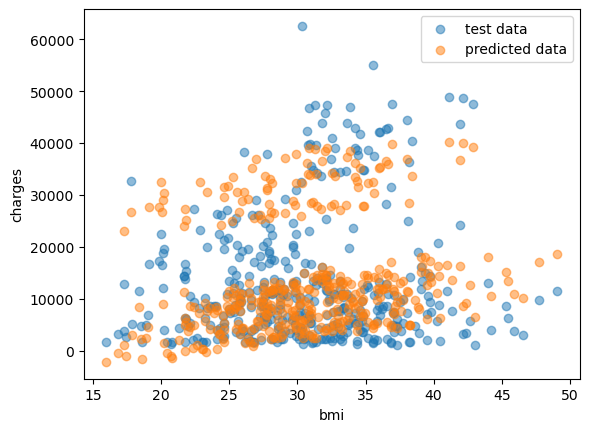

In [1331]:
plt.scatter(x_test['remainder__bmi'], y_test, alpha = 0.5, label = 'test data')
plt.scatter(x_test['remainder__bmi'], lr_test_pred, alpha = 0.5, label = 'predicted data')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.legend()

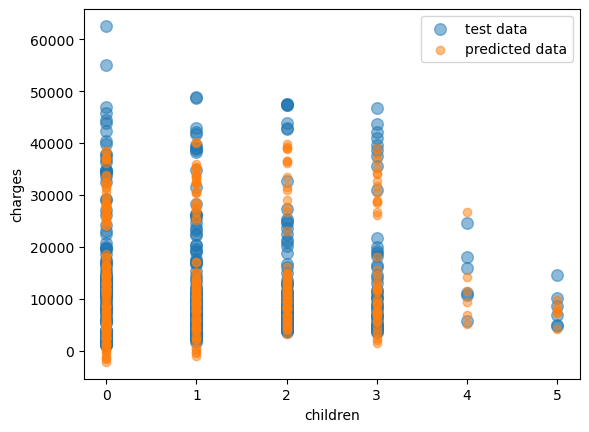

In [1332]:
plt.scatter(x_test['remainder__children'], y_test, alpha = 0.5, label = 'test data', s = 70)
plt.scatter(x_test['remainder__children'], lr_test_pred, alpha = 0.5, label = 'predicted data')
plt.xlabel('children')
plt.ylabel('charges')
plt.legend()

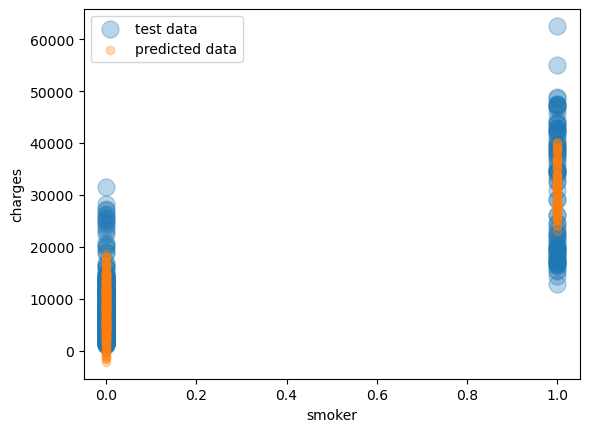

In [1333]:
plt.scatter(x_test['remainder__smoker'], y_test, alpha = 0.3, label = 'test data', s = 150)
plt.scatter(x_test['remainder__smoker'], lr_test_pred, alpha = 0.3, label = 'predicted data')
plt.xlabel('smoker')
plt.ylabel('charges')
plt.legend()

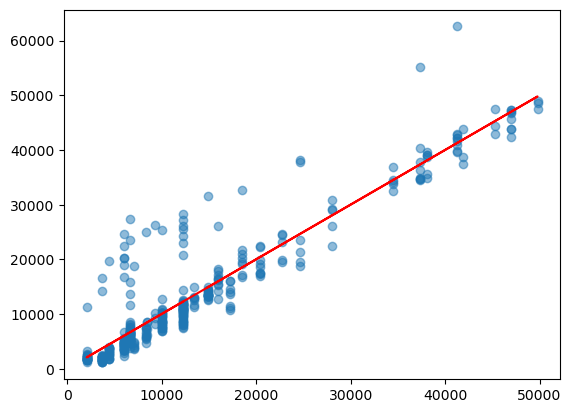

In [1334]:
plt.scatter(dt_test_pred, y_test, alpha = 0.5)
m, b = np.polyfit(dt_test_pred, y_test, 1)
plt.plot(dt_test_pred, m*dt_test_pred+b, color='red')

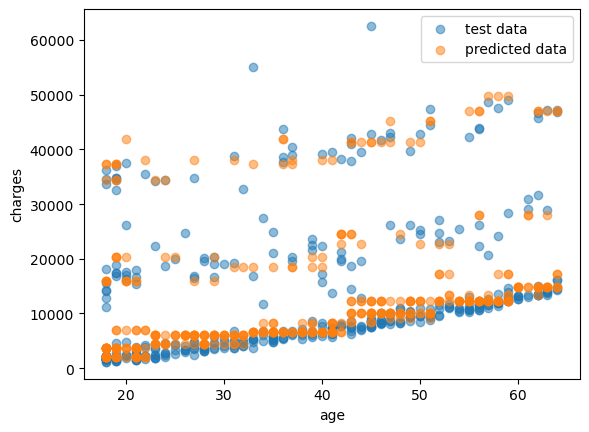

In [1335]:
plt.scatter(x_test['remainder__age'], y_test, alpha = 0.5, label = 'test data')
plt.scatter(x_test['remainder__age'], dt_test_pred, alpha = 0.5, label = 'predicted data')
plt.xlabel('age')
plt.ylabel('charges')
plt.legend()

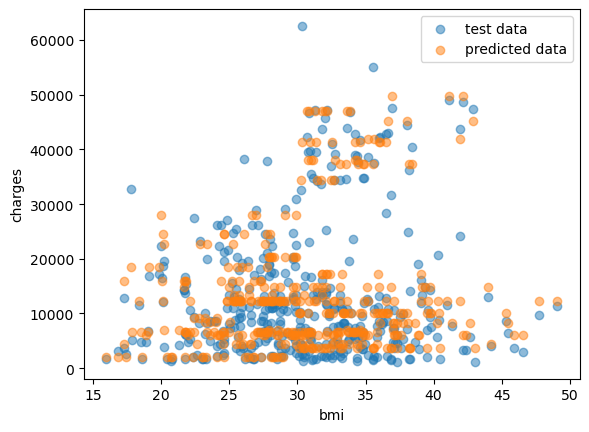

In [1336]:
plt.scatter(x_test['remainder__bmi'], y_test, alpha = 0.5, label = 'test data')
plt.scatter(x_test['remainder__bmi'], dt_test_pred, alpha = 0.5, label = 'predicted data')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.legend()

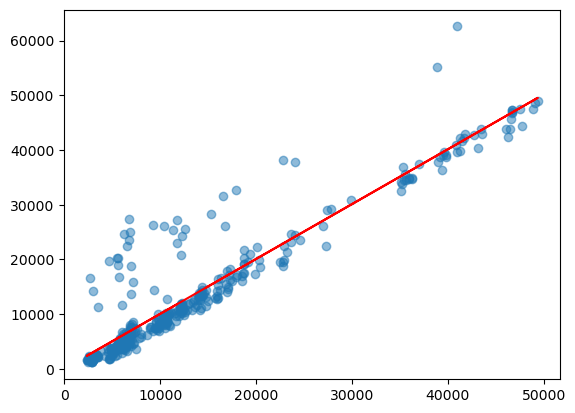

In [1337]:
plt.scatter(rf_test_pred, y_test, alpha = 0.5)
m, b = np.polyfit(rf_test_pred, y_test, 1)
plt.plot(rf_test_pred, m*rf_test_pred+b, color='red')

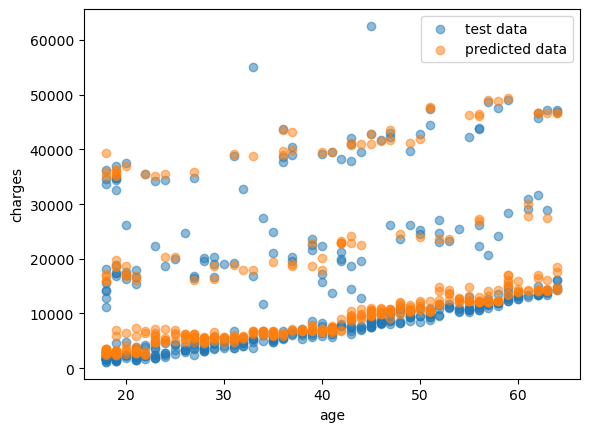

In [1338]:
plt.scatter(x_test['remainder__age'], y_test, alpha = 0.5, label = 'test data')
plt.scatter(x_test['remainder__age'], rf_test_pred, alpha = 0.5, label = 'predicted data')
plt.xlabel('age')
plt.ylabel('charges')
plt.legend()

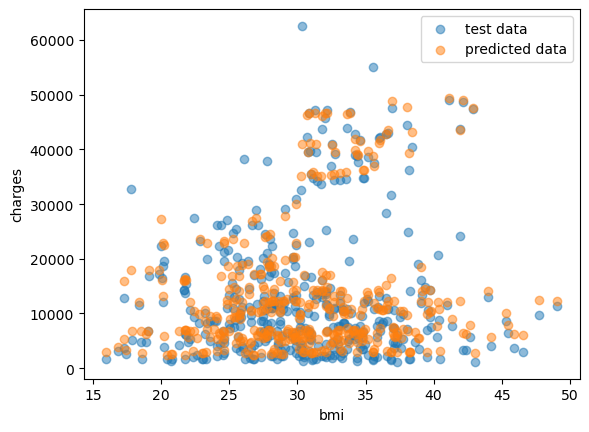

In [1339]:
plt.scatter(x_test['remainder__bmi'], y_test, alpha = 0.5, label = 'test data')
plt.scatter(x_test['remainder__bmi'], rf_test_pred, alpha = 0.5, label = 'predicted data')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.legend()

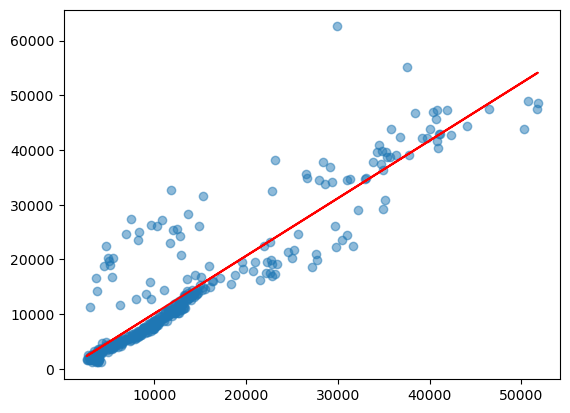

In [1340]:
plt.scatter(mlpr_test_pred, y_test, alpha = 0.5)
m, b = np.polyfit(mlpr_test_pred, y_test, 1)
plt.plot(mlpr_test_pred, m*mlpr_test_pred+b, color='red')

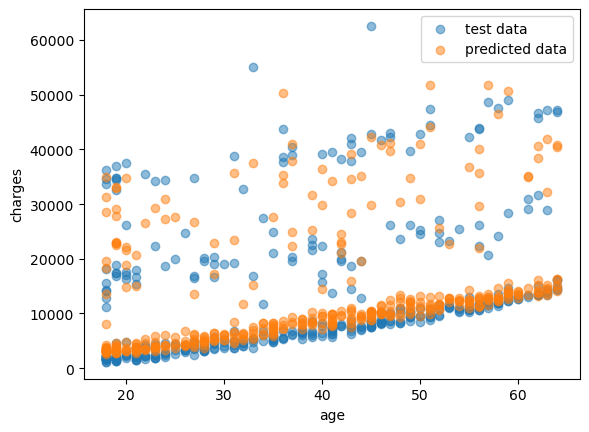

In [1341]:
plt.scatter(x_test['remainder__age'], y_test, alpha = 0.5, label = 'test data')
plt.scatter(x_test['remainder__age'], mlpr_test_pred, alpha = 0.5, label = 'predicted data')
plt.xlabel('age')
plt.ylabel('charges')
plt.legend()

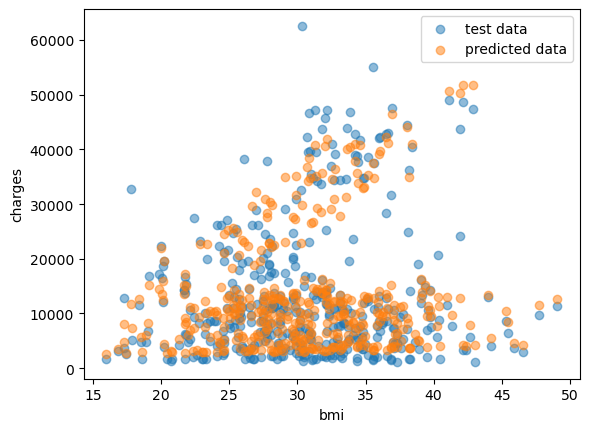

In [1342]:
plt.scatter(x_test['remainder__bmi'], y_test, alpha = 0.5, label = 'test data')
plt.scatter(x_test['remainder__bmi'], mlpr_test_pred, alpha = 0.5, label = 'predicted data')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.legend()

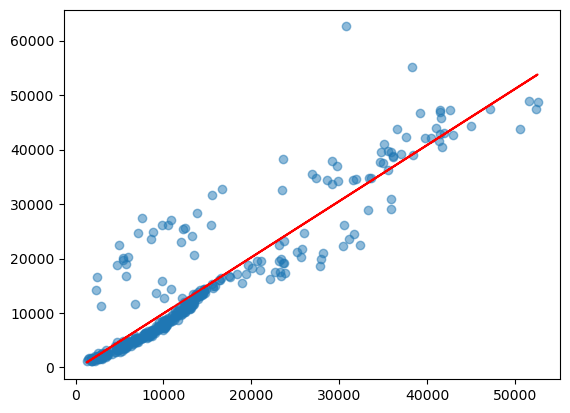

In [1343]:
plt.scatter(mlpradam_test_pred, y_test, alpha = 0.5)
m, b = np.polyfit(mlpradam_test_pred, y_test, 1)
plt.plot(mlpradam_test_pred, m*mlpradam_test_pred+b, color='red')

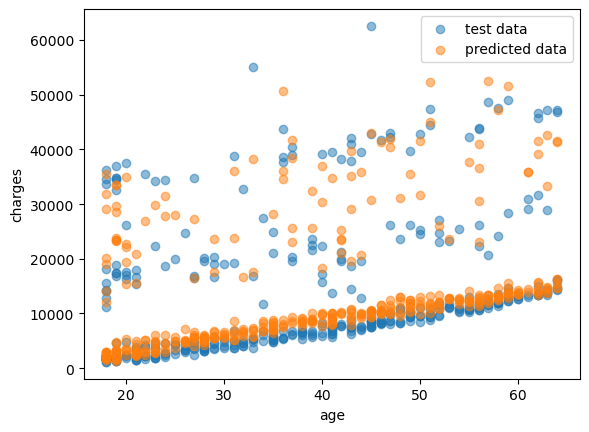

In [1344]:
plt.scatter(x_test['remainder__age'], y_test, alpha = 0.5, label = 'test data')
plt.scatter(x_test['remainder__age'], mlpradam_test_pred, alpha = 0.5, label = 'predicted data')
plt.xlabel('age')
plt.ylabel('charges')
plt.legend()

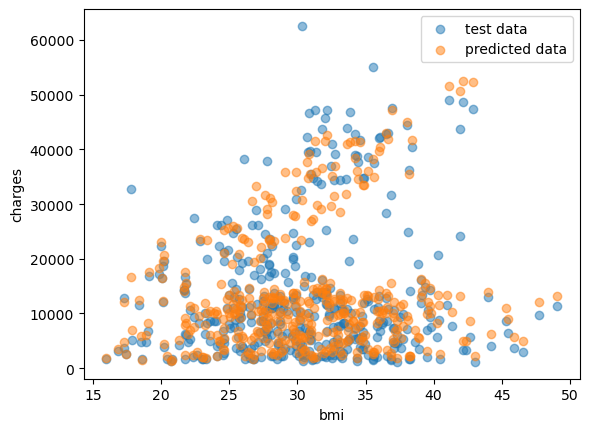

In [1345]:
plt.scatter(x_test['remainder__bmi'], y_test, alpha = 0.5, label = 'test data')
plt.scatter(x_test['remainder__bmi'], mlpradam_test_pred, alpha = 0.5, label = 'predicted data')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.legend()

In [1346]:
plt.plot(np.array(mlpr.loss_curve_))
plt.show()

AttributeError: 'MLPRegressor' object has no attribute 'loss_curve_'

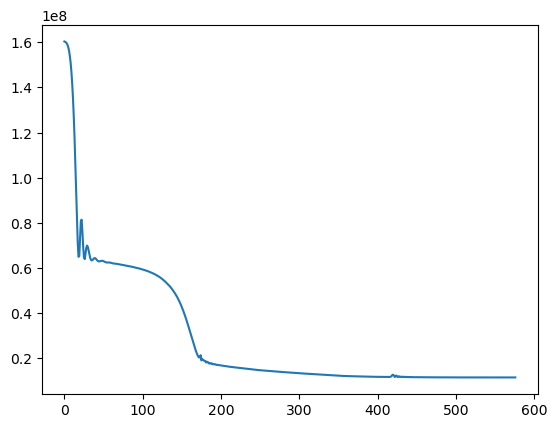

In [1347]:
plt.plot(np.array(mlpradam.loss_curve_))
plt.show()

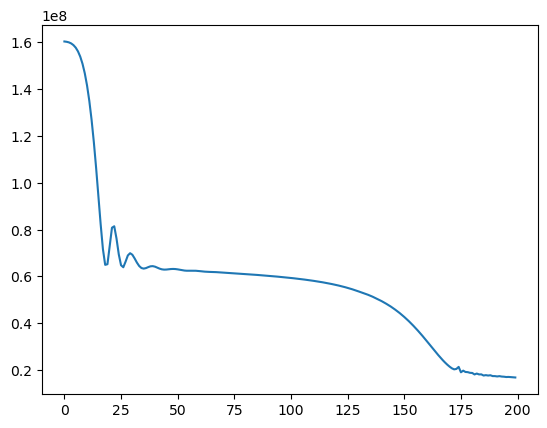

In [1348]:
plt.plot(np.array(mlpradam.loss_curve_[:200]))
plt.show()

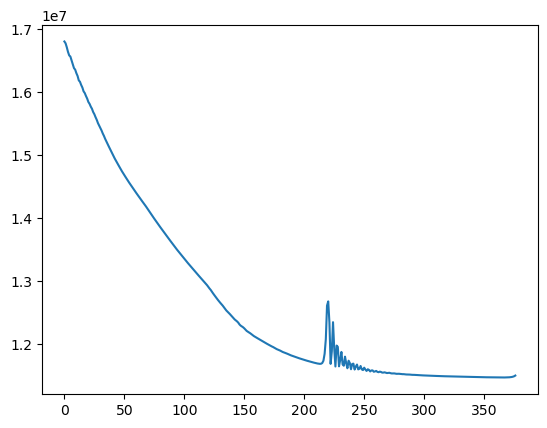

In [1349]:
plt.plot(np.array(mlpradam.loss_curve_[200:]))
plt.show()

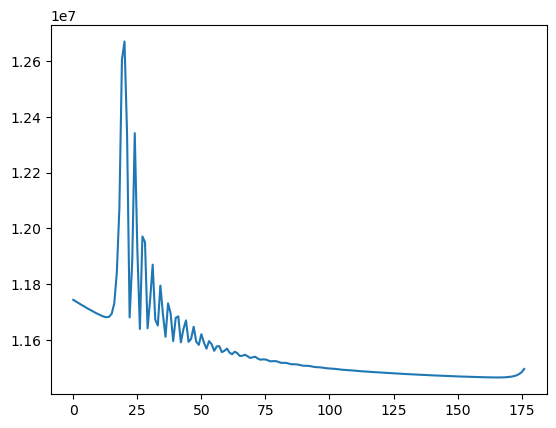

In [1350]:
plt.plot(np.array(mlpradam.loss_curve_[400:]))
plt.show()